In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [11]:

df = pd.read_csv('binance/BTCUSDT_merged.csv')

In [12]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,9588.74,9630.00,9579.34,9617.06,546.960415,2019-09-01 00:59:59.999,5.257943e+06,7428,261.131656,2.510480e+06
1,2019-09-01 01:00:00,9617.06,9642.58,9612.08,9614.99,453.105152,2019-09-01 01:59:59.999,4.362498e+06,5789,258.764082,2.491295e+06
2,2019-09-01 02:00:00,9614.99,9616.00,9595.76,9605.78,458.004517,2019-09-01 02:59:59.999,4.400751e+06,5485,321.355630,3.088171e+06
3,2019-09-01 03:00:00,9606.12,9624.01,9605.78,9623.02,633.588749,2019-09-01 03:59:59.999,6.092024e+06,5500,446.853542,4.296649e+06
4,2019-09-01 04:00:00,9623.02,9630.21,9605.60,9614.46,542.260896,2019-09-01 04:59:59.999,5.216076e+06,5536,368.470786,3.544535e+06


In [13]:
df2 = df[['open_time','close']]

In [14]:
df2.head()

,open_time,close
0,2019-09-01 00:00:00,9617.06
1,2019-09-01 01:00:00,9614.99
2,2019-09-01 02:00:00,9605.78
3,2019-09-01 03:00:00,9623.02
4,2019-09-01 04:00:00,9614.46


In [15]:
df2.to_csv('BTCUSD_Hourly.csv',index=False)

In [16]:
btc_df = pd.read_csv('BTCUSD_Hourly.csv',index_col=[0],parse_dates=[0])

In [17]:
btc_df.head()

,close
open_time,
2019-09-01 00:00:00,9617.06
2019-09-01 01:00:00,9614.99
2019-09-01 02:00:00,9605.78
2019-09-01 03:00:00,9623.02
2019-09-01 04:00:00,9614.46


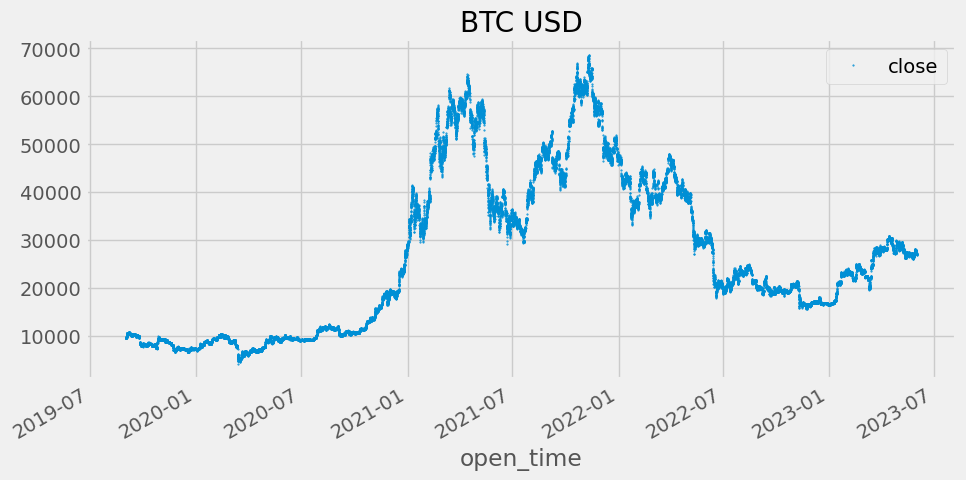

In [18]:
color_pal = sns.color_palette()
btc_df.plot(style='.',
         figsize=(10,5),
         ms =1,
         color=color_pal[0],
         title='BTC USD')
plt.show()

# Simple Prophet Model
Prophet model expects the dataset to be named a specific way. We will rename our dataframe columns before feeding it into the model.
Datetime column named: ds
target : y

In [27]:
btc_usd_train_prophet = btc_df.reset_index() \
    .rename(columns={'open_time':'ds',
                     'close':'y'})

In [28]:
%%time
model = Prophet()
model.fit(btc_usd_train_prophet)

21:17:44 - cmdstanpy - INFO - Chain [1] start processing
21:18:29 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 2.41 s, sys: 125 ms, total: 2.53 s
Wall time: 47.1 s


In [33]:
split_date = '1-Jan-2022'
btc_usd_train = btc_df.loc[btc_df.index <= split_date].copy()
btc_usd_test = btc_df.loc[btc_df.index > split_date].copy()

In [34]:
btc_usd_test_prophet = btc_usd_test.reset_index().rename(columns={'open_time':'ds','close':'y'})

In [35]:
btc_usd_test_fcst = model.predict(btc_usd_test_prophet)

In [36]:
btc_usd_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01 01:00:00,48082.091479,43615.704791,48863.483998,48082.091479,48082.091479,-1795.378332,-1795.378332,-1795.378332,8.607483,...,-18.167836,-18.167836,-18.167836,-1785.817980,-1785.817980,-1785.817980,0.0,0.0,0.0,46286.713147
1,2022-01-01 02:00:00,48070.673647,43687.318643,49075.247024,48070.673647,48070.673647,-1797.057737,-1797.057737,-1797.057737,-2.315787,...,-14.525522,-14.525522,-14.525522,-1780.216428,-1780.216428,-1780.216428,0.0,0.0,0.0,46273.615910
2,2022-01-01 03:00:00,48059.255815,43782.941200,48857.662736,48059.255815,48059.255815,-1798.064991,-1798.064991,-1798.064991,-12.341674,...,-11.083341,-11.083341,-11.083341,-1774.639976,-1774.639976,-1774.639976,0.0,0.0,0.0,46261.190824
3,2022-01-01 04:00:00,48047.837983,43748.814500,48681.616345,48047.837983,48047.837983,-1793.091629,-1793.091629,-1793.091629,-16.121459,...,-7.881303,-7.881303,-7.881303,-1769.088866,-1769.088866,-1769.088866,0.0,0.0,0.0,46254.746354
4,2022-01-01 05:00:00,48036.420151,43532.983154,49170.185786,48036.420151,48036.420151,-1781.005511,-1781.005511,-1781.005511,-12.486404,...,-4.955765,-4.955765,-4.955765,-1763.563342,-1763.563342,-1763.563342,0.0,0.0,0.0,46255.414639


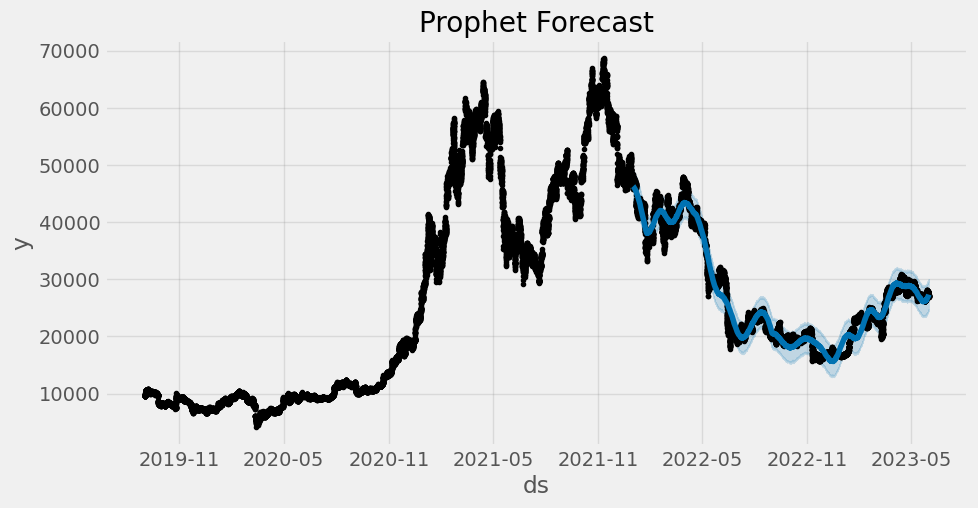

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(btc_usd_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

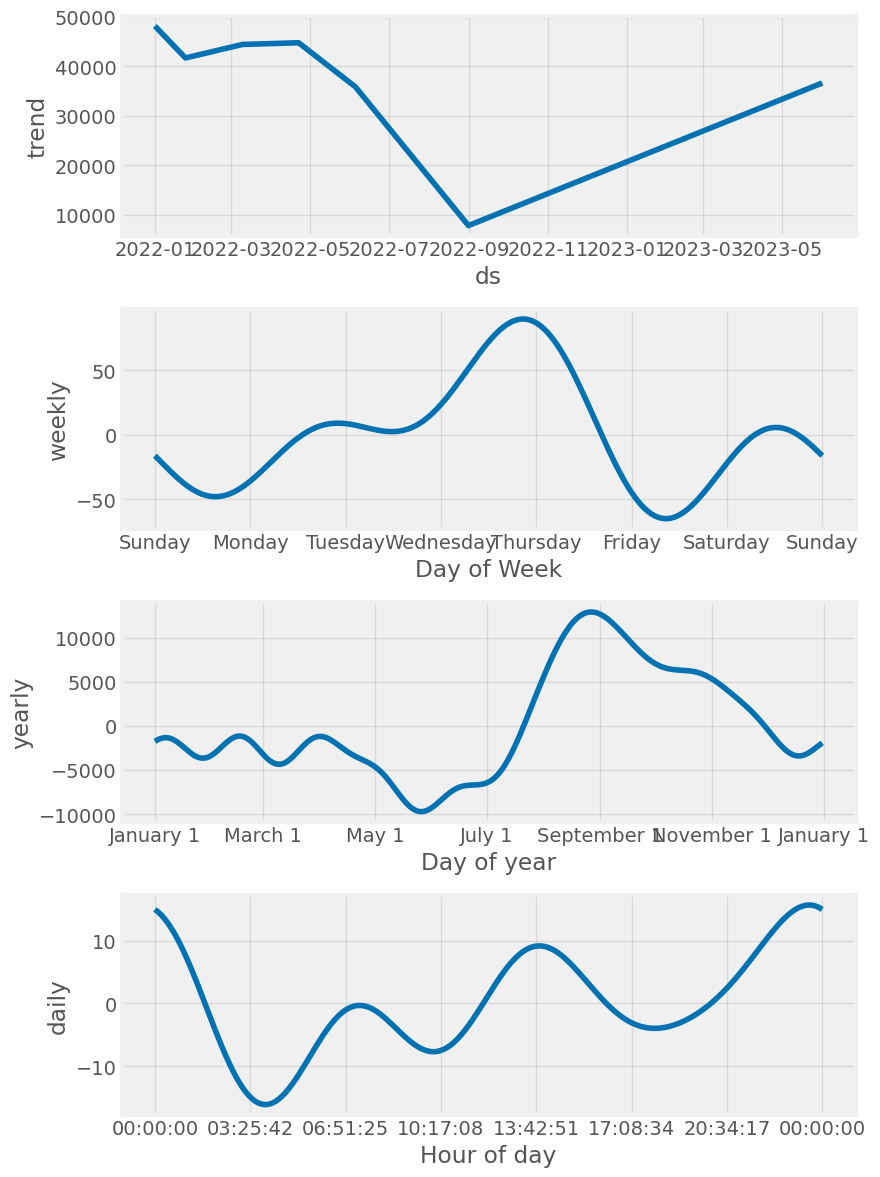

In [38]:
fig = model.plot_components(btc_usd_test_fcst)
plt.show()

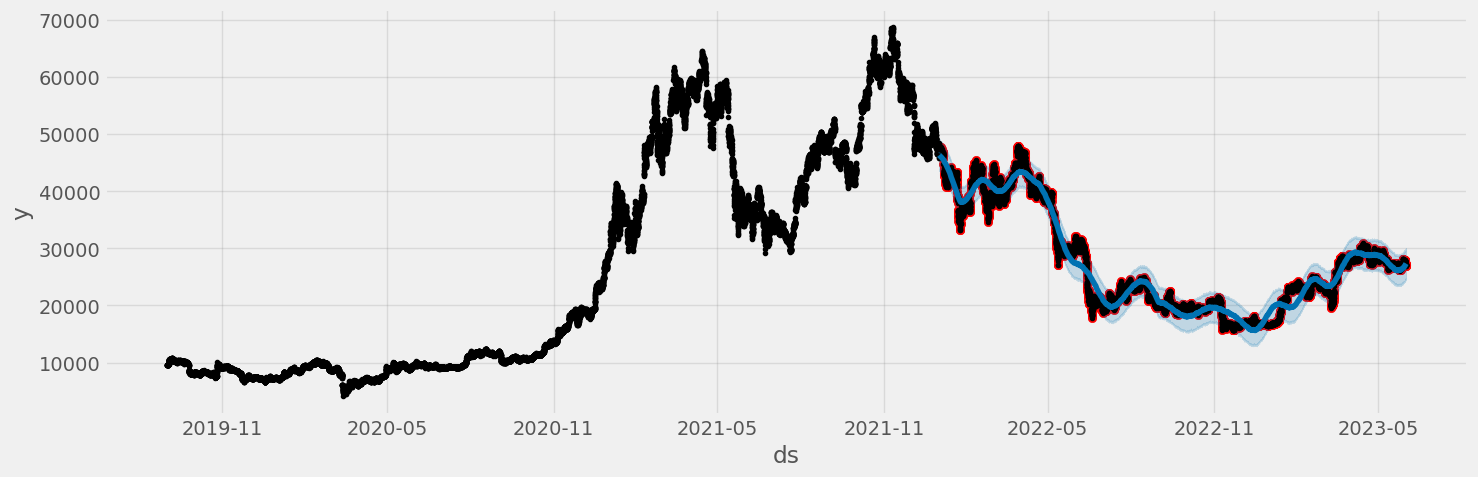

In [42]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(btc_usd_test.index, btc_usd_test['close'], color='r')
fig = model.plot(btc_usd_test_fcst, ax=ax)

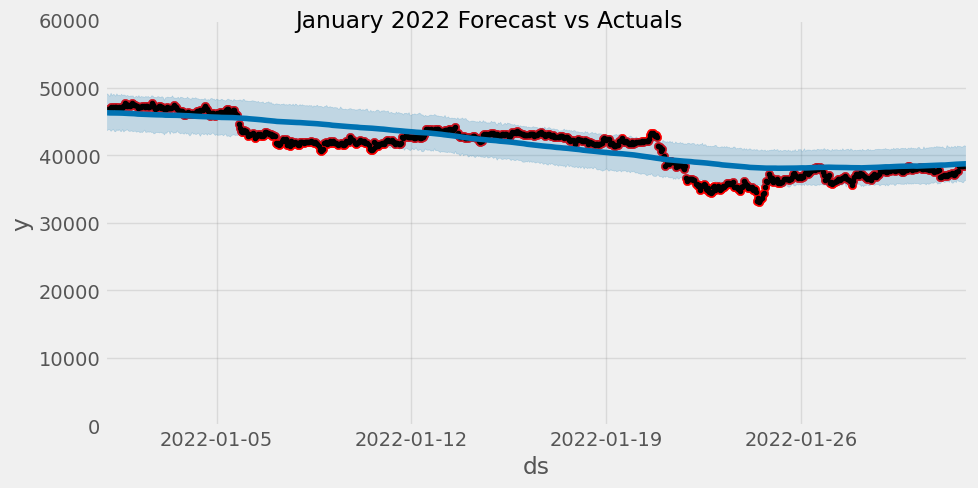

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(btc_usd_test.index, btc_usd_test['close'], color='r')
fig = model.plot(btc_usd_test_fcst, ax=ax)
ax.set_xbound(lower='01-01-2022',
              upper='02-01-2022')
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2022 Forecast vs Actuals')

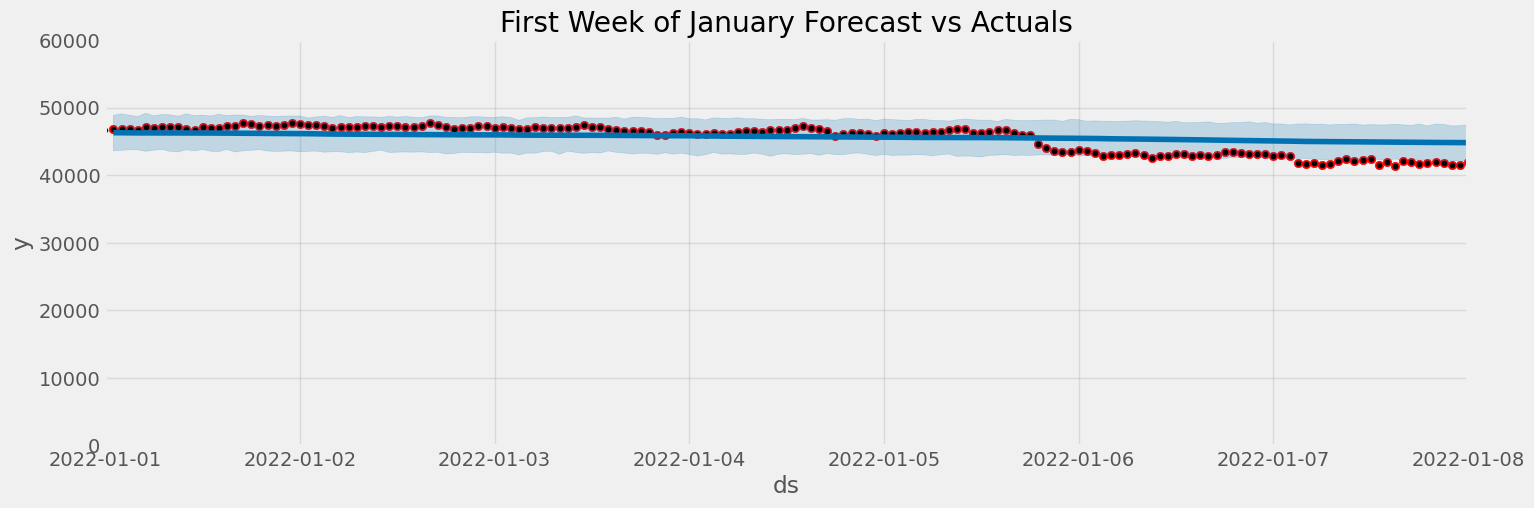

In [46]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(btc_usd_test.index, btc_usd_test['close'], color='r')
fig = model.plot(btc_usd_test_fcst, ax=ax)
ax.set_xbound(lower='01-01-2022', upper='01-08-2022')
ax.set_ylim(0, 60000)
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

# Evaluate the model with Error Metrics

In [47]:
np.sqrt(mean_squared_error(y_true=btc_usd_test['close'],
                   y_pred=btc_usd_test_fcst['yhat']))

1751.0030624202423

In [48]:
mean_absolute_error(y_true=btc_usd_test['close'],
                   y_pred=btc_usd_test_fcst['yhat'])

1379.4819023299372

In [50]:
mean_absolute_percentage_error(y_true=btc_usd_test['close'],
                   y_pred=btc_usd_test_fcst['yhat'])

5.48020068849063